# Load the Titanic dataset using Python's pandas library

In [13]:
import pandas as pd
train_df = pd.read_csv("C:\\Users\\sai\\OneDrive\\Desktop\\Titanic_train.csv")
test_df = pd.read_csv("C:\\Users\\sai\\OneDrive\\Desktop\\Titanic_test.csv")

# Check for missing values

In [14]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#  Explore data distributions using histograms and box plots

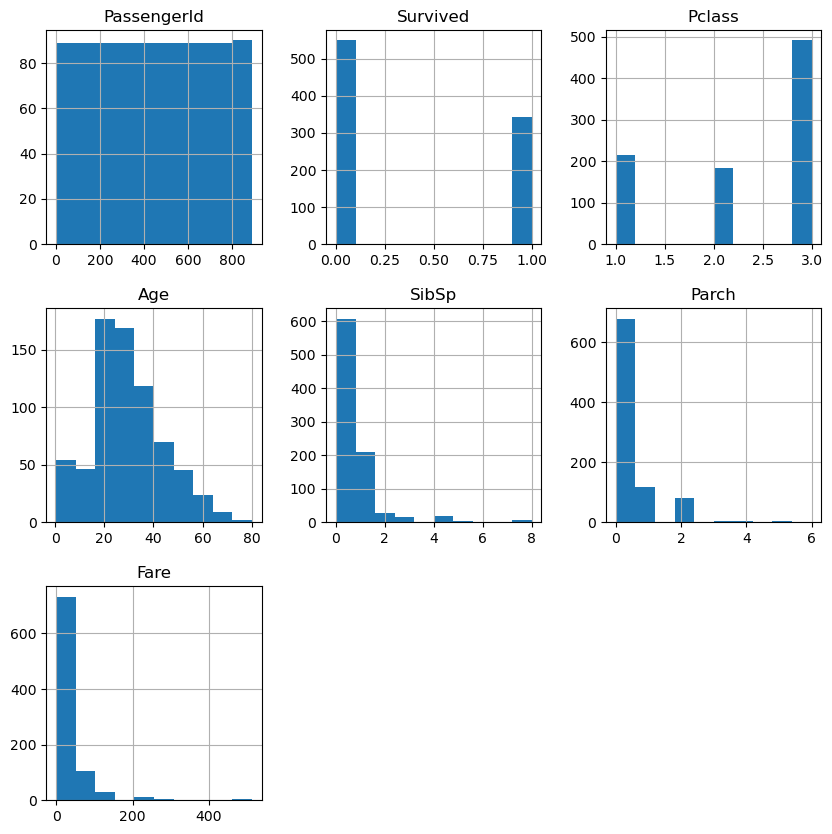

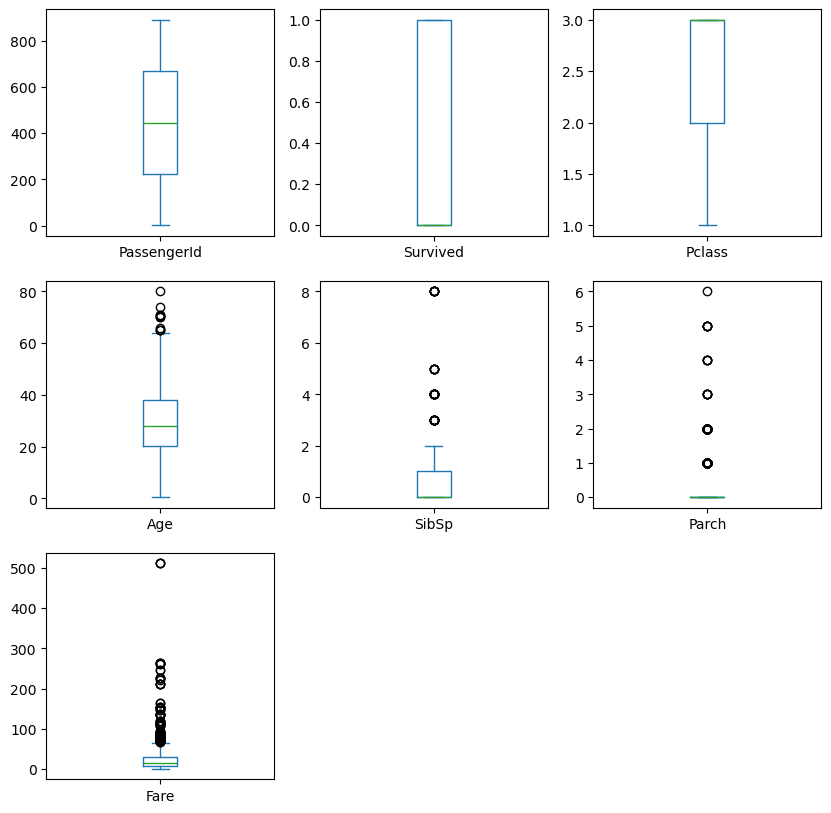

In [15]:
import matplotlib.pyplot as plt

# Histograms
train_df.hist(figsize=(10, 10))
plt.show()

# Box plots
train_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 10))
plt.show()

# Visualize relationships between features and survival using scatter plots and bar plots

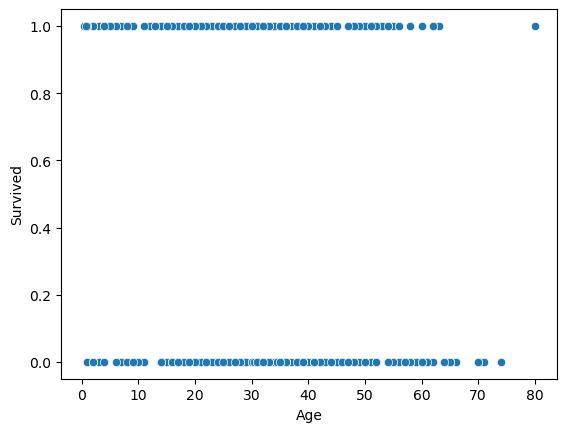

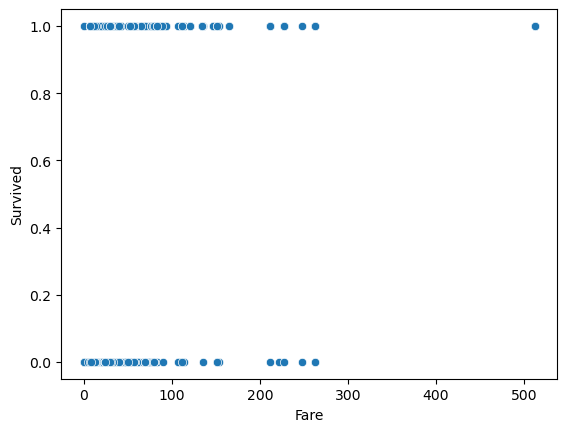

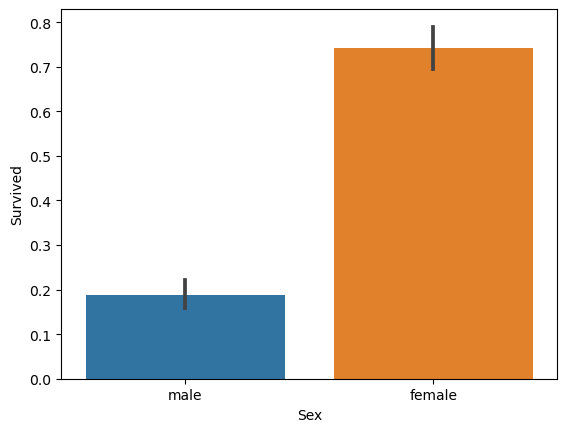

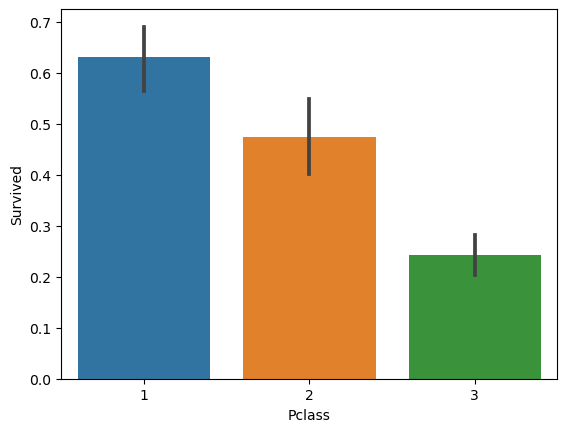

In [16]:
import seaborn as sns

# Scatter plots
sns.scatterplot(x='Age', y='Survived', data=train_df)
plt.show()

sns.scatterplot(x='Fare', y='Survived', data=train_df)
plt.show()

# Bar plots
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

# Impute missing values

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_df[['Age', 'Fare']] = imputer.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = imputer.transform(test_df[['Age', 'Fare']])

# Encode categorical variables using one-hot encoding or label encoding



In [18]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

# Split the preprocessed dataset into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), 
                                                    train_df['Survived'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Build predictive models using LightGBM and XGBoost algorithms

In [22]:
!pip install lightgbm
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.4 MB 1.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.0 MB/s eta 0:00:01
   ----------- -------

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

# Load your dataset
df = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_train.csv")
df = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_test.csv")
# Convert categorical columns into numerical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'])

# Rename columns to remove special characters
df.columns = df.columns.str.replace(r'[^\w]', '_', regex=True)

# Check the cleaned column names to ensure no special characters are present
print(df.columns)

# Split your data into training and testing sets
X = df.drop('Survived', axis=1)  # Replace 'Survived' with the name of your target column
y = df['Survived']  # Replace 'Survived' with the name of your target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM model
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_params = {'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.05}
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)

# XGBoost model
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_params = {'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'learning_rate': 0.1}
xgb_model = xgb.train(xgb_params, xgb_train, num_boost_round=100)

# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# LightGBM Predictions
lgb_pred_prob = lgb_model.predict(X_test)
lgb_pred = [1 if prob > 0.5 else 0 for prob in lgb_pred_prob]

# XGBoost Predictions
xgb_test = xgb.DMatrix(X_test)
xgb_pred_prob = xgb_model.predict(xgb_test)
xgb_pred = [1 if prob > 0.5 else 0 for prob in xgb_pred_prob]

# Accuracy
lgb_accuracy = accuracy_score(y_test, lgb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Precision
lgb_precision = precision_score(y_test, lgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)

# Recall
lgb_recall = recall_score(y_test, lgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)

# F1 Score
lgb_f1 = f1_score(y_test, lgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# AUC-ROC
lgb_auc = roc_auc_score(y_test, lgb_pred_prob)
xgb_auc = roc_auc_score(y_test, xgb_pred_prob)

# Print results
print(f"Accuracy: {lgb_accuracy:.4f}")
print(f"Precision: {lgb_precision:.4f}")
print(f"Recall: {lgb_recall:.4f}")
print(f"F1 Score: {lgb_f1:.4f}")
print(f"AUC-ROC: {lgb_auc:.4f}")

print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")
print(f"AUC-ROC: {xgb_auc:.4f}")


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q',
       ...
       'Cabin_E52', 'Cabin_E60', 'Cabin_F', 'Cabin_F_E46', 'Cabin_F_E57',
       'Cabin_F_G63', 'Cabin_F2', 'Cabin_F33', 'Cabin_F4', 'Cabin_G6'],
      dtype='object', length=868)


KeyError: "['Survived'] not found in axis"